In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
fil=zipfile.ZipFile('drive/My Drive/LSTM/jigsaw-toxic-comment-classification-challenge.zip','r')
fil.extractall()
fil.close()

In [0]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [0]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [33]:
train.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [34]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [0]:
list_classes=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
y=train[list_classes].values
list_sentence_train=train['comment_text']
list_sentence_test=test['comment_text']


In [0]:
max_features=2000
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentence_train))
list_tokenizer_train=tokenizer.texts_to_sequences(list_sentence_train)
list_tokenizer_test=tokenizer.texts_to_sequences(list_sentence_test)


In [37]:
list_tokenizer_train[:1]


[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  1116,
  86,
  331,
  51,
  50,
  15,
  60,
  148,
  7,
  34,
  117,
  1221,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  89,
  985]]

In [0]:
maxlen=200
X_t=pad_sequences(list_tokenizer_train,maxlen=maxlen)
X_tes=pad_sequences(list_tokenizer_test,maxlen=maxlen)


In [0]:
total_num_words=[len(one_comment) for one_comment in list_tokenizer_train]

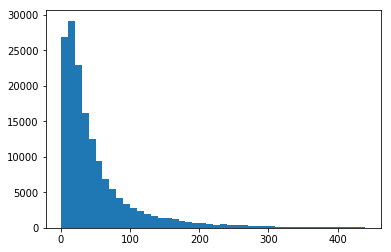

In [40]:
import matplotlib.pyplot as plt
plt.hist(total_num_words,bins=np.arange(0,450,10))
plt.show()

In [0]:

from keras.layers import Dense,LSTM,Embedding,Dropout,Activation,GlobalMaxPooling1D
from keras.models import Sequential

In [0]:
embed_Size=128
model=Sequential()
model.add(Embedding(max_features,embed_Size,input_length=200))
model.add(LSTM(60, name='lstm_layer'))

model.add(Dense(6,activation='sigmoid'))


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=(['accuracy']))

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X_t,y,test_size=0.2)

X_test,X_val,y_test,y_val=train_test_split(X_valid,y_valid,test_size=0.5)

In [18]:
model.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_val,y_val))

Train on 127656 samples, validate on 15958 samples
Epoch 1/5
127656/127656 [==============================] - 1560s 12ms/step - loss: 0.0565 - acc: 0.9805 - val_loss: 0.0548 - val_acc: 0.9811
Epoch 2/5
127656/127656 [==============================] - 1532s 12ms/step - loss: 0.0533 - acc: 0.9812 - val_loss: 0.0540 - val_acc: 0.9814
Epoch 3/5
127656/127656 [==============================] - 1560s 12ms/step - loss: 0.0503 - acc: 0.9820 - val_loss: 0.0542 - val_acc: 0.9808
Epoch 4/5
127656/127656 [==============================] - 1572s 12ms/step - loss: 0.0478 - acc: 0.9826 - val_loss: 0.0534 - val_acc: 0.9814
Epoch 5/5
127656/127656 [==============================] - 1566s 12ms/step - loss: 0.0454 - acc: 0.9833 - val_loss: 0.0546 - val_acc: 0.9814


In [0]:
model.save_weights("model_lstm_5_epoch.h5")


In [21]:
model.evaluate(X_test,y_test,batch_size=32)

15957/15957 [==============================] - 72s 4ms/step


[0.05680826876027442, 0.9809592317696644]

In [0]:
ans=model.predict(X_tes)


In [25]:
ans

array([[9.72275615e-01, 5.69678962e-01, 8.24247241e-01, 7.71910548e-02,
        8.92395496e-01, 3.71821165e-01],
       [2.28548050e-03, 7.03334808e-06, 4.22716141e-04, 3.01301479e-05,
        2.55137682e-04, 1.61647797e-04],
       [1.11910701e-03, 2.56299973e-06, 2.53796577e-04, 4.67896461e-06,
        1.06304884e-04, 2.70307064e-05],
       ...,
       [1.40380859e-03, 3.27825546e-06, 2.47001648e-04, 3.86238098e-05,
        1.25318766e-04, 5.59091568e-05],
       [1.07967556e-02, 5.54323196e-06, 4.42117453e-04, 9.38475132e-05,
        6.81132078e-04, 5.08517027e-04],
       [9.83948708e-01, 4.12061214e-02, 8.21139991e-01, 3.62467766e-03,
        4.80095506e-01, 6.53213263e-03]], dtype=float32)

In [26]:
train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [0]:
submission=pd.DataFrame()
submission['id']=test['id']
submission['toxic']=ans[:,0]
submission['severe_toxic']=ans[:,1]
submission['obscene']=ans[:,2]
submission['threat']=ans[:,3]
submission['insult']=ans[:,4]
submission['identity_hate']=ans[:,5]


In [28]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.972276,0.569679,0.824247,0.077191,0.892395,0.371821
1,0000247867823ef7,0.002285,0.000007,0.000423,0.000030,0.000255,0.000162
2,00013b17ad220c46,0.001119,0.000003,0.000254,0.000005,0.000106,0.000027
3,00017563c3f7919a,0.000511,0.000002,0.000120,0.000007,0.000036,0.000027
4,00017695ad8997eb,0.022086,0.000136,0.015144,0.000267,0.006074,0.001235


In [0]:
submission.to_csv('submit.csv',index=False)